In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/airbnb-listings-in-major-us-cities-deloitte-ml/train.csv
/kaggle/input/airbnb-listings-in-major-us-cities-deloitte-ml/test.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
test = pd.read_csv("../input/airbnb-listings-in-major-us-cities-deloitte-ml/test.csv")
train = pd.read_csv("../input/airbnb-listings-in-major-us-cities-deloitte-ml/train.csv")

In [4]:
test.shape

(25458, 28)

# EDA

In [5]:
cat = ['accommodates','bathrooms','bed_type','cancellation_policy','cleaning_fee']

In [6]:
train[cat]

,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee
0,3,1.0,Real Bed,strict,True
1,7,1.0,Real Bed,strict,True
2,5,1.0,Real Bed,moderate,True
3,4,1.0,Real Bed,flexible,True
4,2,1.0,Real Bed,moderate,True
...,...,...,...,...,...
74106,1,1.0,Real Bed,flexible,False
74107,4,2.0,Real Bed,moderate,True
74108,5,1.0,Real Bed,moderate,True
74109,2,1.0,Real Bed,strict,True


In [7]:
train.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
id                        74111 non-null int64
log_price                 74111 non-null float64
property_type             74111 non-null object
room_type                 74111 non-null object
amenities                 74111 non-null object
accommodates              74111 non-null int64
bathrooms                 73911 non-null float64
bed_type                  74111 non-null object
cancellation_policy       74111 non-null object
cleaning_fee              74111 non-null bool
city                      74111 non-null object
description               74111 non-null object
first_review              58247 non-null object
host_has_profile_pic      73923 non-null object
host_identity_verified    73923 non-null object
host_response_rate        55812 non-null object
host_since                73923 non-null object
instant_bookable          74111 non-null object
last_review               582

In [9]:
categorical_features = ['property_type','room_type','bed_type','cancellation_policy','cleaning_fee','city','instant_bookable','zipcode','neighbourhood','host_identity_verified','host_since','first_review','last_review']
numeric_features = ['accommodates','bathrooms','latitude','longitude','number_of_reviews','review_scores_rating','bedrooms','beds']


In [10]:
df_categorical_train = pd.DataFrame(data =train,columns= categorical_features)
df_numeric_train = pd.DataFrame(data = train, columns=numeric_features)
df_categorical_test = pd.DataFrame(data =test,columns= categorical_features)
df_numeric_test = pd.DataFrame(data = test, columns=numeric_features)


In [11]:
final_d= pd.concat([df_numeric_train, df_categorical_train], axis =1)
final_d_test = pd.concat([df_numeric_test, df_categorical_test], axis =1)

In [12]:
final_df = pd.concat([final_d,final_d_test], axis = 0)

In [13]:
final_df.shape

(99569, 21)

In [14]:
final_df.isnull().sum()

accommodates                  0
bathrooms                   279
latitude                      0
longitude                     0
number_of_reviews             0
review_scores_rating      22439
bedrooms                    119
beds                        177
property_type                 0
room_type                     0
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
instant_bookable              0
zipcode                    1287
neighbourhood              9337
host_identity_verified      243
host_since                  243
first_review              21300
last_review               21252
dtype: int64

In [15]:
final_df['host_since'] = pd.to_numeric(final_df['host_since'], errors='coerce')
final_df['first_review'] = pd.to_numeric(final_df['first_review'], errors='coerce')
final_df['last_review'] = pd.to_numeric(final_df['last_review'], errors='coerce')
final_df['neighbourhood'] = pd.to_numeric(final_df['neighbourhood'], errors='coerce')
final_df['zipcode'] = pd.to_numeric(final_df['zipcode'], errors='coerce')
final_df['host_identity_verified'] = pd.to_numeric(final_df['host_identity_verified'], errors='coerce')

In [16]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
final_df[categorical_features] = final_df[categorical_features].apply(lambda col: le.fit_transform(col))

In [17]:
final_df

,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds,property_type,room_type,...,cancellation_policy,cleaning_fee,city,instant_bookable,zipcode,neighbourhood,host_identity_verified,host_since,first_review,last_review
0,3,1.0,40.696524,-73.991617,2,100.0,1.0,1.0,0,0,...,3,1,4,0,152,0,0,0,0,0
1,7,1.0,40.766115,-73.989040,6,93.0,3.0,3.0,0,0,...,3,1,4,1,66,66382,66382,66382,66382,66382
2,5,1.0,40.808110,-73.943756,10,92.0,1.0,3.0,0,0,...,2,1,4,1,73,66381,66381,66381,66381,66381
3,4,1.0,37.772004,-122.431619,0,NaN,2.0,2.0,17,0,...,0,1,5,0,651,66380,66380,66380,66380,66380
4,2,1.0,38.925627,-77.034596,4,40.0,0.0,1.0,0,0,...,2,1,2,1,251,66379,66379,66379,66379,66379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25453,6,2.0,37.739624,-122.414839,8,90.0,3.0,4.0,17,0,...,3,1,5,0,645,33183,33183,33183,33183,33183
25454,1,2.5,34.148955,-118.368865,0,NaN,1.0,1.0,0,1,...,0,0,3,0,576,33182,33182,33182,33182,33182
25455,2,1.0,34.086756,-118.353835,11,95.0,1.0,1.0,17,0,...,2,1,3,0,384,33181,33181,33181,33181,33181
25456,4,1.0,40.760537,-73.989708,0,NaN,1.0,3.0,0,0,...,2,1,4,0,82,49783,49783,49783,49783,49783


In [18]:
final_df.fillna(method='ffill', inplace = True)

In [19]:
final_df.isnull().sum()

accommodates              0
bathrooms                 0
latitude                  0
longitude                 0
number_of_reviews         0
review_scores_rating      0
bedrooms                  0
beds                      0
property_type             0
room_type                 0
bed_type                  0
cancellation_policy       0
cleaning_fee              0
city                      0
instant_bookable          0
zipcode                   0
neighbourhood             0
host_identity_verified    0
host_since                0
first_review              0
last_review               0
dtype: int64

In [20]:
final_df.columns

Index(['accommodates', 'bathrooms', 'latitude', 'longitude',
       'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds',
       'property_type', 'room_type', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'instant_bookable', 'zipcode', 'neighbourhood',
       'host_identity_verified', 'host_since', 'first_review', 'last_review'],
      dtype='object')

In [21]:
final_df.isnull().sum()

accommodates              0
bathrooms                 0
latitude                  0
longitude                 0
number_of_reviews         0
review_scores_rating      0
bedrooms                  0
beds                      0
property_type             0
room_type                 0
bed_type                  0
cancellation_policy       0
cleaning_fee              0
city                      0
instant_bookable          0
zipcode                   0
neighbourhood             0
host_identity_verified    0
host_since                0
first_review              0
last_review               0
dtype: int64

df_box = final_df['bed_type']
df_box
sns.boxplot(data=df_box)

In [22]:
#final_df[final_df.columns[1:]].corr()['log_price'][:]

In [23]:
#X_sample = final_df.drop('log_price', axis = 1)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X_total = scaler.fit_transform(final_df)

In [24]:
X_total = pd.DataFrame(X_total,columns = final_df.columns)

In [25]:
X_total[cat]

,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee
0,0.133333,0.064516,1.0,0.6,1.0
1,0.400000,0.064516,1.0,0.6,1.0
2,0.266667,0.064516,1.0,0.4,1.0
3,0.200000,0.064516,1.0,0.0,1.0
4,0.066667,0.064516,1.0,0.4,1.0
...,...,...,...,...,...
99564,0.333333,0.129032,1.0,0.6,1.0
99565,0.000000,0.161290,1.0,0.0,0.0
99566,0.066667,0.064516,1.0,0.4,1.0
99567,0.200000,0.064516,1.0,0.4,1.0


In [26]:
X_total.shape

(99569, 21)

In [27]:
y = train['log_price']

In [28]:
y.shape

(74111,)

In [29]:
X_total = pd.DataFrame(X_total)

In [30]:
X = X_total.iloc[0:74111,:]

In [31]:
test_data = X_total.iloc[74111:,:]

# Splitting Data into train test samples

In [32]:
from sklearn.model_selection import train_test_split


train_X, test_X, train_y, test_y = train_test_split(X,y)


# Model Training


# 1. Linear Regression

In [33]:
test_data

,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds,property_type,room_type,...,cancellation_policy,cleaning_fee,city,instant_bookable,zipcode,neighbourhood,host_identity_verified,host_since,first_review,last_review
74111,0.066667,0.064516,0.076123,0.077961,0.009917,0.9625,0.071429,0.025,0.0,0.5,...,0.0,1.0,0.6,0.0,0.224747,0.07864,0.07864,0.07864,0.07864,0.07864
74112,0.133333,0.064516,0.814977,0.942607,0.003306,0.7500,0.071429,0.025,0.0,0.0,...,0.4,1.0,0.8,0.0,0.086869,0.07863,0.07863,0.07863,0.07863,0.07863
74113,0.000000,0.064516,0.490934,0.000800,0.003306,1.0000,0.071429,0.025,0.0,0.5,...,0.4,1.0,1.0,0.0,0.329293,0.07862,0.07862,0.07862,0.07862,0.07862
74114,0.000000,0.064516,0.070344,0.078562,0.011570,0.9250,0.000000,0.025,0.0,0.0,...,0.6,1.0,0.6,0.0,0.220202,0.07861,0.07861,0.07861,0.07861,0.07861
74115,0.066667,0.064516,0.816654,0.941371,0.000000,0.9250,0.071429,0.025,0.0,0.0,...,0.0,1.0,0.8,0.0,0.031313,0.07870,0.07870,0.07870,0.07870,0.07870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99564,0.333333,0.129032,0.485876,0.001876,0.013223,0.8750,0.214286,0.100,0.5,0.0,...,0.6,1.0,1.0,0.0,0.325758,0.33327,0.33327,0.33327,0.33327,0.33327
99565,0.000000,0.161290,0.089436,0.080398,0.000000,0.8750,0.071429,0.025,0.0,0.5,...,0.0,0.0,0.6,0.0,0.290909,0.33326,0.33326,0.33326,0.33326,0.33326
99566,0.066667,0.064516,0.082569,0.080690,0.018182,0.9375,0.071429,0.025,0.5,0.0,...,0.4,1.0,0.6,0.0,0.193939,0.33325,0.33325,0.33325,0.33325,0.33325
99567,0.200000,0.064516,0.819410,0.941687,0.000000,0.9375,0.071429,0.075,0.0,0.0,...,0.4,1.0,0.8,0.0,0.041414,0.49999,0.49999,0.49999,0.49999,0.49999


In [34]:
from sklearn.linear_model import LinearRegression

Linear_model = LinearRegression()

Linear_model.fit(train_X,train_y)
Linear_pred = Linear_model.predict(test_X)


In [35]:
test_data.iloc[0:1,:]

,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds,property_type,room_type,...,cancellation_policy,cleaning_fee,city,instant_bookable,zipcode,neighbourhood,host_identity_verified,host_since,first_review,last_review
74111,0.066667,0.064516,0.076123,0.077961,0.009917,0.9625,0.071429,0.025,0.0,0.5,...,0.0,1.0,0.6,0.0,0.224747,0.07864,0.07864,0.07864,0.07864,0.07864


In [36]:
test_pred = Linear_model.predict(test_data.iloc[0:1,:])

In [37]:
bal = test.iloc[2:3,:]

In [38]:
type(bal)

pandas.core.frame.DataFrame

In [41]:
inp = int(input('Pleas enter any value between 0 to 25457:'))


Pleas enter any value between 0 to 25457:55


In [42]:
test_pred_Linear = Linear_model.predict(test_data.iloc[inp:inp+1,:])


In [43]:
test_pred_Linear

array([5.15187864])

In [44]:
disp_df = pd.DataFrame(test.iloc[inp:inp+1,:])

In [45]:
print(disp_df.iloc[0])
print("The Predicted Price from Linear Regression is ",test_pred_Linear)

id                                                                 11635717
property_type                                                     Apartment
room_type                                                   Entire home/apt
amenities                 {TV,"Cable TV",Internet,"Wireless Internet","A...
accommodates                                                              4
bathrooms                                                                 1
bed_type                                                           Real Bed
cancellation_policy                                                moderate
cleaning_fee                                                          False
city                                                                    NYC
description               Coney Island 1 bedroom apartment, central hub ...
first_review                                                     2017-03-14
host_has_profile_pic                                                      t
host_identit

In [46]:
from sklearn.metrics import mean_squared_error

MSE_score_Linear = mean_squared_error(test_y, Linear_pred)
print("Mean Squared Error for Linear Regression Model :",MSE_score_Linear)

Mean Squared Error for Linear Regression Model : 0.23759760882658398


In [47]:
from sklearn.metrics import mean_absolute_error

MAE_score_Linear = mean_absolute_error(test_y,Linear_pred)
print("Mean Absolute Error for Linear Regression Model :",MAE_score_Linear)

Mean Absolute Error for Linear Regression Model : 0.365967566168319


In [48]:
from sklearn.metrics import r2_score

r2_score_Linear = r2_score(test_y,Linear_pred)
print("R2 score for Linear Regression Model :",r2_score_Linear)

R2 score for Linear Regression Model : 0.5314351213658279


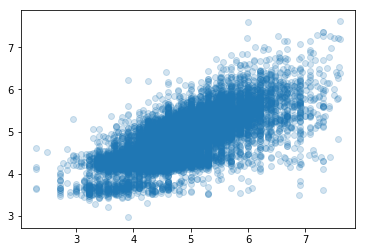

In [49]:
plt.scatter(test_y, Linear_pred, alpha=0.2)
plt.show()

# 2. Decision Tree Regressor 

In [50]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import time

In [51]:
param_grid = {'max_depth': np.arange(3, 10),'max_features': np.arange(3,6)}
Tree_model = GridSearchCV(DecisionTreeRegressor(), param_grid)
start_time = time.time()
grid_result = Tree_model.fit(train_X, train_y)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best: 0.574727 using {'max_depth': 8, 'max_features': 5}
Execution time: 4.220630645751953 ms


In [52]:
Tree_pred = Tree_model.predict(test_X)

In [53]:
from sklearn.metrics import mean_squared_error

MSE_score_tree = mean_squared_error(test_y,Tree_pred)
print("Mean Squared Error for Decision Tree Regressor :",MSE_score_tree)

Mean Squared Error for Decision Tree Regressor : 0.20929580017365285


In [54]:
from sklearn.metrics import mean_absolute_error

MAE_score_tree = mean_absolute_error(test_y,Tree_pred)
print("Mean Absolute Error for Decision Tree Regressor :", MAE_score_tree)

Mean Absolute Error for Decision Tree Regressor : 0.3402116253946658


In [55]:
from sklearn.metrics import r2_score

r2_score_Tree = r2_score(test_y,Tree_pred)
print("R2 score for Decision Tree Regressor :",r2_score_Tree)

R2 score for Decision Tree Regressor : 0.587248955528895


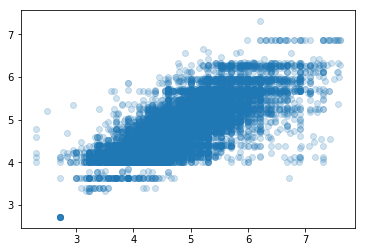

In [56]:
plt.scatter(test_y, Tree_pred, alpha=0.2)
#plt.plot(test_y, Linear_pred, color='red')
plt.show()

# 3. Random Forest Regressor

In [57]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state = 42)

rf_model.fit(train_X,train_y)
rf_pred = rf_model.predict(test_X)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [58]:
from sklearn.metrics import mean_squared_error

MSE_score_rf = mean_squared_error(test_y, rf_pred)
print("Mean Squared Error for Random Forest :",MSE_score_rf)

Mean Squared Error for Random Forest : 0.17656137758834559


In [59]:
from sklearn.metrics import mean_absolute_error

MAE_score_rf = mean_absolute_error(test_y,rf_pred)
print("Mean Absolute Error for Random Forest :", MAE_score_rf)

Mean Absolute Error for Random Forest : 0.303577681447806


In [60]:
from sklearn.metrics import r2_score

r2_score_rf = r2_score(test_y,rf_pred)
print("R2 score for Random Forest: ",r2_score_rf)

R2 score for Random Forest:  0.6518043221489317


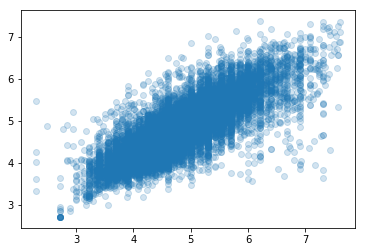

In [61]:
plt.scatter(test_y, rf_pred, alpha=0.2)
#plt.plot(test_y, Linear_pred, color='red')
plt.show()

# 4. XGBoost

In [62]:
from sklearn import ensemble
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
XG_model = ensemble.GradientBoostingRegressor(**params)

XG_model.fit(train_X, train_y)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [63]:
XG_Pred = XG_model.predict(test_X)

In [64]:
from sklearn.metrics import mean_squared_error

MSE_score_XG = mean_squared_error(test_y, XG_Pred)
print("Mean Squared Error for XGBoost :",MSE_score_XG)

Mean Squared Error for XGBoost : 0.17171688293552012


In [65]:
from sklearn.metrics import mean_absolute_error

MAE_score_XG = mean_absolute_error(test_y,XG_Pred)
print("Mean Absolute Error for XGBoost:", MAE_score_XG)

Mean Absolute Error for XGBoost: 0.30399997182649924


In [66]:
from sklearn.metrics import r2_score

r2_score_XG = r2_score(test_y,XG_Pred)
print("R2 score for XGBoost :",r2_score_XG)

R2 score for XGBoost : 0.6613581222071715


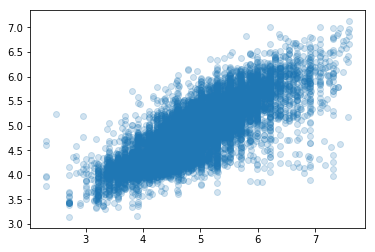

In [67]:
plt.scatter(test_y, XG_Pred, alpha=0.2)
#plt.plot(test_y, Linear_pred, color='red')
plt.show()

In [68]:
inp = int(input('Pleas enter any value between 0 to 25457:'))
test_pred_Linear = Linear_model.predict(test_data.iloc[inp:inp+1,:])
test_pred_XG = XG_model.predict(test_data.iloc[inp:inp+1,:])
test_pred_rf = rf_model.predict(test_data.iloc[inp:inp+1,:])
test_pred_Tree = Tree_model.predict(test_data.iloc[inp:inp+1,:])

disp_df = pd.DataFrame(test.iloc[inp:inp+1,:])
print(disp_df.iloc[0])
print("The Predicted Price from Linear Regression is --------->",test_pred_Linear)
print("The Predicted Price from XG Boost is --------->",test_pred_XG)
print("The Predicted Price from Random Forest Regression is --------->",test_pred_rf)
print("The Predicted Price from Decision Tree Regression is --------->",test_pred_Tree)




Pleas enter any value between 0 to 25457:55
id                                                                 11635717
property_type                                                     Apartment
room_type                                                   Entire home/apt
amenities                 {TV,"Cable TV",Internet,"Wireless Internet","A...
accommodates                                                              4
bathrooms                                                                 1
bed_type                                                           Real Bed
cancellation_policy                                                moderate
cleaning_fee                                                          False
city                                                                    NYC
description               Coney Island 1 bedroom apartment, central hub ...
first_review                                                     2017-03-14
host_has_profile_pic                        